In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Fish.csv')
df


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


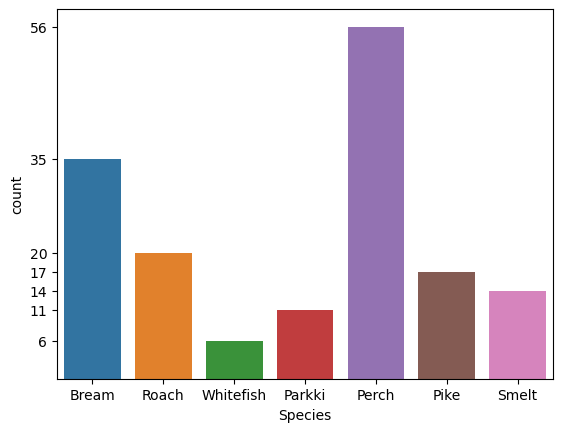

In [4]:
sb.countplot(data=df,x='Species')
f=df['Species'].value_counts()
plt.yticks(f)
plt.show()

In [3]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [4]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.isnull().sum()/df.shape[0]*100

Species    0.0
Weight     0.0
Length1    0.0
Length2    0.0
Length3    0.0
Height     0.0
Width      0.0
dtype: float64

<Axes: >

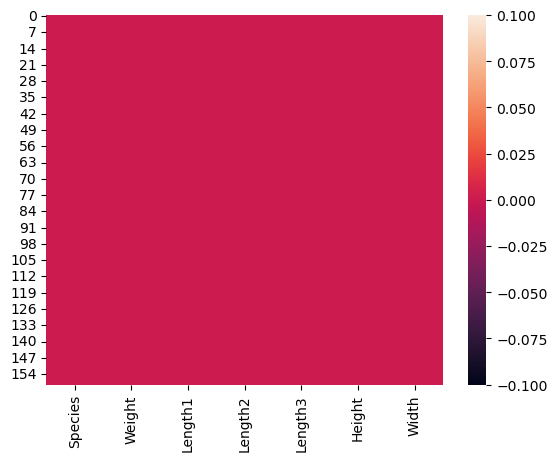

In [6]:
sb.heatmap(df.isnull())

In [7]:
df_obj=df.select_dtypes(object)
df_obj

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream
...,...
154,Smelt
155,Smelt
156,Smelt
157,Smelt


<Axes: xlabel='Weight', ylabel='Species'>

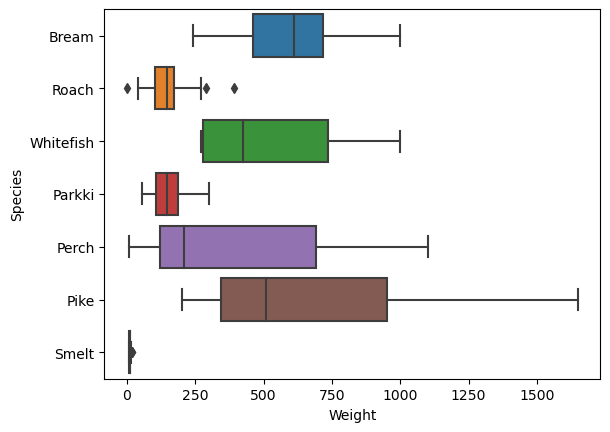

In [8]:
sb.boxplot(data=df,x='Weight',y='Species')

In [9]:
df[(df['Species']=='Roach')&(df['Weight']>250)]

,Species,Weight,Length1,Length2,Length3,Height,Width
52,Roach,290.0,24.0,26.0,29.2,8.8768,4.4968
53,Roach,272.0,25.0,27.0,30.6,8.5680,4.7736
54,Roach,390.0,29.5,31.7,35.0,9.4850,5.3550


<Axes: xlabel='Weight', ylabel='Species'>

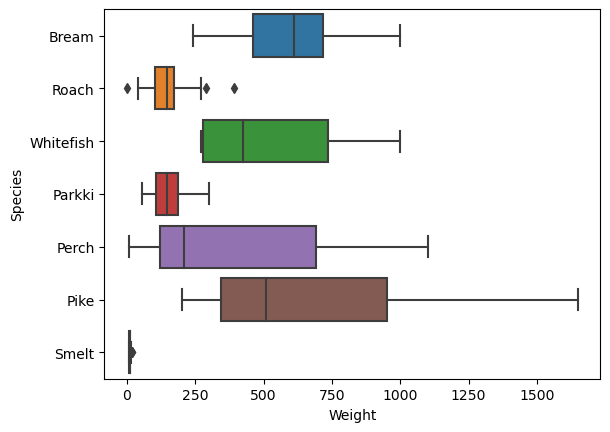

In [10]:
sb.boxplot(data=df,x='Weight',y='Species')

In [11]:
a=df[(df['Species']=='Roach')&(df['Weight']>250)].index
a

Int64Index([52, 53, 54], dtype='int64')

In [12]:
df.drop(a,inplace=True)

In [13]:
df_num=df.select_dtypes(['float64'])
df_num

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_obj.columns
for i in df_obj:
    df_obj[i]=le.fit_transform(df_obj[i])

In [15]:
df_obj

,Species
0,0
1,0
2,0
3,0
4,0
...,...
154,5
155,5
156,5
157,5


In [16]:
df_obj['Species'].unique()

array([0, 4, 6, 1, 2, 3, 5])

In [17]:
df_sum=pd.concat([df_num,df_obj],axis=1)
df_sum

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0
...,...,...,...,...,...,...,...
157,19.7,13.2,14.3,15.2,2.8728,2.0672,5
158,19.9,13.8,15.0,16.2,2.9322,1.8792,5
52,NaN,NaN,NaN,NaN,NaN,NaN,4
53,NaN,NaN,NaN,NaN,NaN,NaN,4


In [18]:
df_sum.to_csv('Fish2.csv',index='False',encoding='utf-8') #uniform text format

In [19]:
aa=df_sum.tail(3).index
aa

Int64Index([52, 53, 54], dtype='int64')

In [20]:
df_sum.drop(aa,inplace=True)

In [21]:
df_sum.tail()

,Weight,Length1,Length2,Length3,Height,Width,Species
154,12.2,11.5,12.2,13.4,2.0904,1.3936,5
155,13.4,11.7,12.4,13.5,2.4300,1.2690,5
156,12.2,12.1,13.0,13.8,2.2770,1.2558,5
157,19.7,13.2,14.3,15.2,2.8728,2.0672,5
158,19.9,13.8,15.0,16.2,2.9322,1.8792,5


In [22]:
X=df_sum.drop('Weight',axis=1)
Y=df_sum['Weight']



In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [25]:
X_train.shape

(109, 6)

In [26]:
X_test.shape

(47, 6)

In [27]:
Y_train.shape

(109,)

In [28]:
Y_test.shape

(47,)

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [30]:
X_train

array([[ 6.06868892e-02,  2.02766072e-02, -1.11917012e-01,
        -3.46697978e-01,  1.43618212e-01, -8.30977109e-02],
       [ 1.77215349e+00,  1.71963653e+00,  1.57507593e+00,
        -2.96987315e-01,  2.93627146e-01,  5.20745655e-01],
       [-8.94794466e-01, -8.73606356e-01, -9.55413483e-01,
        -9.35053000e-01, -8.78565432e-01, -8.30977109e-02],
       [ 4.80678694e-01,  4.91775313e-01,  6.59020622e-01,
         1.58783526e+00,  4.62307269e-01, -1.29078444e+00],
       [-4.53803072e-01, -4.41399209e-01, -3.74942793e-01,
        -3.58909301e-01, -3.68049092e-01,  1.12458902e+00],
       [ 1.86877087e-02,  4.97452763e-02,  2.41807314e-01,
         8.21262220e-01,  4.62435154e-01, -1.29078444e+00],
       [-6.11299998e-01, -5.88742554e-01, -5.47270029e-01,
        -4.79339872e-01, -3.77576514e-01,  1.12458902e+00],
       [-9.68100375e-02, -9.75980693e-02, -2.20755267e-01,
        -4.19389005e-01,  9.93700518e-02, -8.30977109e-02],
       [-8.10796105e-01, -8.34314797e-01, -8.284

In [31]:
X_test

array([[ 1.1211662 ,  1.13026314,  1.01274495,  0.64963063,  1.79947131,
        -0.08309771],
       [-0.99979242, -0.96201236, -1.08239145, -0.92024557, -0.82319129,
        -0.08309771],
       [-0.28580635, -0.32352453, -0.31145381, -0.46655164, -0.32277785,
         1.12458902],
       [ 0.91117029,  0.9829198 ,  1.14879277,  2.17700757,  1.20288846,
        -1.29078444],
       [-1.40928443, -1.41386529, -1.37262679, -1.17312573, -1.37015481,
         1.12458902],
       [-0.76879693, -0.78520035, -0.77401639, -0.6135202 , -0.67727467,
         1.12458902],
       [ 0.32318177,  0.34443197,  0.53204266,  1.42471313,  0.48596597,
        -1.29078444],
       [ 0.80617234,  0.786462  ,  0.69530004,  0.44554768,  1.56863915,
        -0.08309771],
       [-0.23330737, -0.19582697, -0.18447585, -0.21203689, -0.10377504,
         2.33227575],
       [-1.64027992, -1.69872909, -1.71728126, -1.66927084, -2.00369638,
         1.72843239],
       [-1.56678135, -1.62014597, -1.64472243, -1.

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [33]:
lr.coef_

array([  88.7586278 ,  660.02327644, -547.82851701,  207.6883312 ,
         -2.62409458,   72.91090802])

In [34]:
lr.intercept_

388.5064220183485

In [35]:
ypred=lr.predict(X_test)
ypred

array([ 803.34900357,   62.75770373,  306.17267608,  843.65946565,
        -75.85393402,  182.39786031,  553.56537287,  680.59927948,
        465.89222519, -152.91627657, -128.00882972,   75.3272354 ,
        192.20977926,  156.73110664,  193.7244767 ,  437.3470241 ,
        928.27780965,  568.17706763,  566.26786396,  845.0543631 ,
        862.04537027, -170.42837977, -194.03928936,  389.09082244,
        255.26876247, -316.25985697,  209.26719982,  155.9172822 ,
        916.42206699,  226.68999951,  409.57573155, 1118.17790453,
        276.55514825,  960.46807718, 1256.22164339,  -42.506685  ,
        382.50348786,  671.0632833 , -136.69163295,  364.34043813,
        -43.6365534 ,  720.85021294,  934.43487227,  696.51002184,
        533.44594607,  562.26122394,  -17.2670186 ])

In [36]:
dict={"Actual op":Y_test,"Predict op":ypred}
df1=pd.DataFrame(dict)
df1

,Actual op,Predict op
120,900.0,803.349004
78,78.0,62.757704
51,180.0,306.172676
31,955.0,843.659466
35,40.0,-75.853934
40,0.0,182.397860
14,600.0,553.565373
112,685.0,680.599279
56,270.0,465.892225
149,9.8,-152.916277


In [37]:
from sklearn.metrics import mean_squared_error
print("mean squared error",mean_squared_error(Y_test,ypred))

mse=mean_squared_error(Y_test,ypred)

mean squared error 18485.966037762682


In [38]:
rmse=np.sqrt(mse)
rmse

135.9631054285047

In [39]:
from sklearn.metrics import r2_score

In [40]:
print("r2score is ",r2_score(Y_test,ypred))

r2score is  0.8898782034583167


In [41]:
residual_error=Y_test-ypred
residual_error

120     96.650996
78      15.242296
51    -126.172676
31     111.340534
35     115.853934
40    -182.397860
14      46.434627
112      4.400721
56    -195.892225
149    162.716277
153    137.808830
81       9.672765
95     -22.209779
93     -11.731107
92     -43.724477
5       12.652976
126     71.722190
16     131.822932
19      83.732136
29     154.945637
59     -62.045370
146    177.928380
145    200.739289
102    -89.090822
96     -30.268762
72     322.159857
97     -64.267200
42     -35.917282
125    183.577933
44     -81.690000
108    -89.575732
141    131.822095
69     -76.555148
33      14.531923
144    393.778357
62     102.506685
130    -82.503488
134   -215.063283
151    146.691633
128   -164.340438
61      98.636553
28     129.149787
127     65.565128
114      3.489978
57    -227.445946
17     137.738776
76      87.267019
Name: Weight, dtype: float64

Text(0, 0.5, 'residual_error')

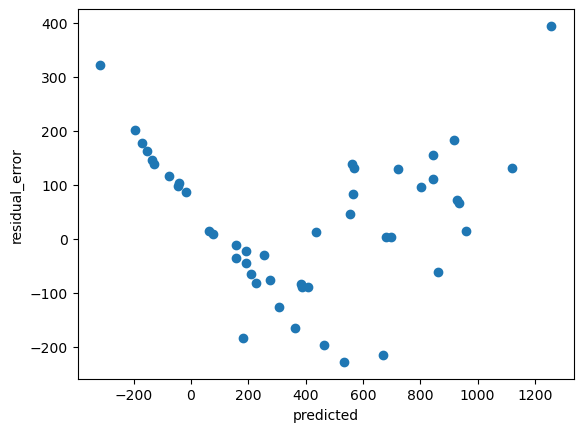

In [42]:
plt.scatter(ypred,residual_error)
plt.xlabel("predicted")
plt.ylabel('residual_error')

<Axes: >

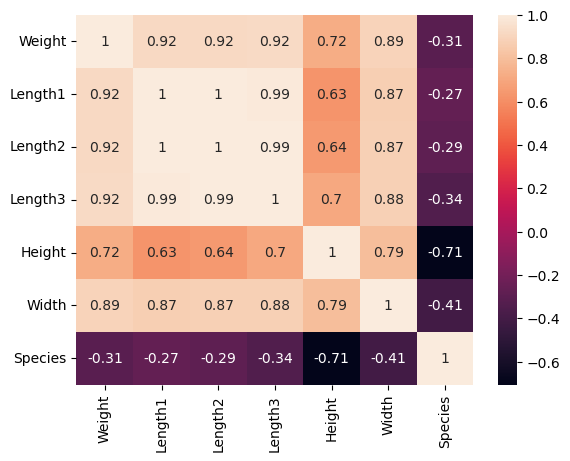

In [43]:
sb.heatmap(df_sum.corr(),annot=True)

<Axes: xlabel='Weight', ylabel='Count'>

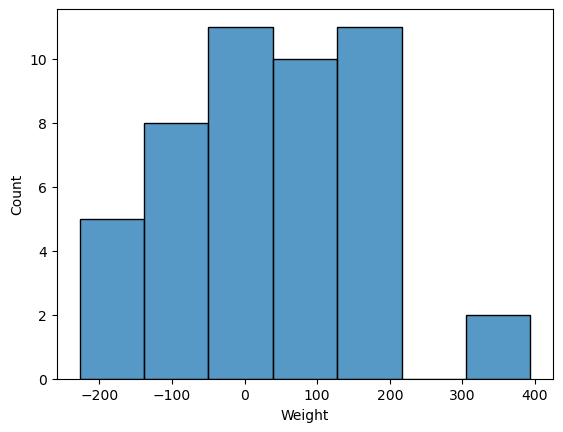

In [44]:
sb.histplot(residual_error)

<Axes: xlabel='Weight', ylabel='Density'>

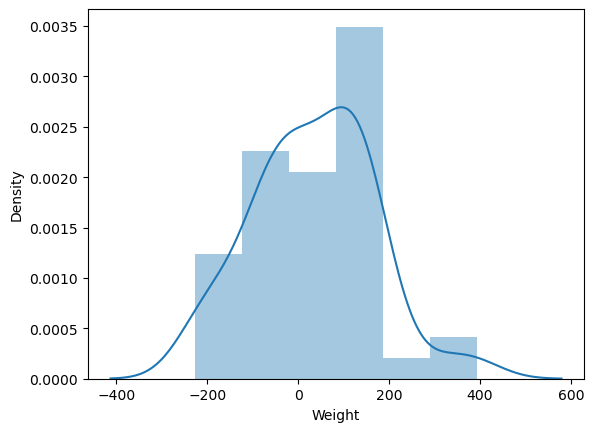

In [45]:
sb.distplot(residual_error)

<Axes: xlabel='Weight', ylabel='Density'>

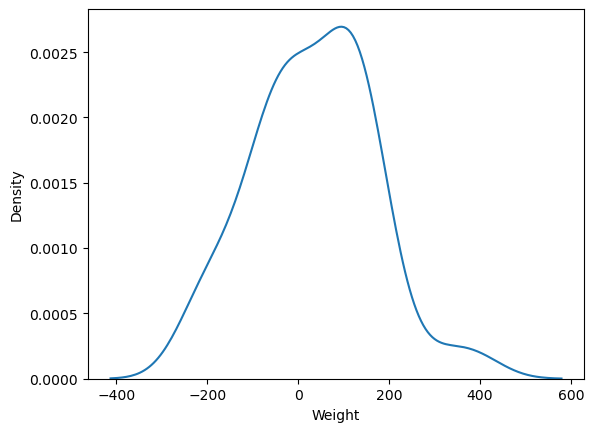

In [46]:
sb.distplot(residual_error,hist=False)

In [47]:
residual_error.skew()

0.167331202167453

In [48]:
lr.score(X_train,Y_train)

0.897316311122039

In [49]:
lr.score(X_test,Y_test)

0.8898782034583167

In [50]:
X=df_sum.drop(['Weight','Length2'],axis=1)
Y=df_sum['Weight']

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
pl=PolynomialFeatures(2)

In [53]:
X_poly=pl.fit_transform(X)


In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [55]:
X_train.shape

(109, 21)

In [56]:
X_train=ss.fit_transform(X_train)

In [57]:
X_test=ss.transform(X_test)

In [58]:
X_train

array([[ 0.        ,  0.06068689, -0.11191701, ..., -0.0292874 ,
         0.1259813 , -0.37814172],
       [ 0.        ,  1.77215349,  1.57507593, ...,  0.12847387,
         0.86208938,  0.19273705],
       [ 0.        , -0.89479447, -0.95541348, ..., -0.89697167,
        -0.31481222, -0.37814172],
       ...,
       [ 0.        , -1.18878873, -1.28192825, ..., -1.05946364,
        -0.42654094, -0.37814172],
       [ 0.        ,  3.11612727,  2.96276367, ...,  1.12117038,
         1.38902321,  0.19273705],
       [ 0.        , -0.92629385, -0.91913406, ..., -0.95262154,
         0.44953136,  0.99196734]])

In [59]:
X_test

array([[ 0.00000000e+00,  1.12116620e+00,  1.01274495e+00,
         6.49630627e-01,  1.79947131e+00, -8.30977109e-02,
         1.02736636e+00,  9.84673792e-01,  1.03175633e+00,
         1.72560591e+00,  4.79925605e-01,  9.31050597e-01,
         8.93179629e-01,  1.65006314e+00,  4.59056895e-01,
         4.65000071e-01,  1.31152273e+00,  7.41074072e-01,
         2.14358397e+00,  8.40030407e-01, -3.78141720e-01],
       [ 0.00000000e+00, -9.99792418e-01, -1.08239145e+00,
        -9.20245568e-01, -8.23191290e-01, -8.30977109e-02,
        -8.79731534e-01, -9.22204158e-01, -1.03296235e+00,
        -9.47058270e-01, -4.10264528e-01, -9.63036728e-01,
        -1.02913077e+00, -9.88471742e-01, -4.17523839e-01,
        -8.60327935e-01, -9.40493868e-01, -3.09737984e-01,
        -8.59230553e-01, -2.90933377e-01, -3.78141720e-01],
       [ 0.00000000e+00, -2.85806350e-01, -3.11453812e-01,
        -4.66551636e-01, -3.22777853e-01,  1.12458902e+00,
        -3.97639874e-01, -4.13552442e-01, -5.57096646e

In [60]:
lr.fit(X_train,Y_train)

LinearRegression()

In [61]:
lr.coef_

array([    0.        ,  -306.08299942,  -225.67602258,   -13.45406965,
         184.39969215,   -19.84596477, -1447.34911538,  1064.23472662,
        1339.20289097,   488.0186069 ,   561.34991386,   917.52919601,
        -967.97764676,  -762.90102124,  -412.4986561 ,    -5.5334112 ,
        -256.96093847,    87.4534624 ,   265.78260104,  -176.58126421,
          -4.69459338])

In [62]:
lr.intercept_

388.5064220183466

In [63]:
ypred=lr.predict(X_test)
ypred

array([ 885.63474037,  100.05498633,  211.03008179,  884.00824438,
         35.46543129,  135.45529558,  527.12317865,  735.24447073,
        274.12536537,   12.36832876,    9.02573555,   52.14926738,
        141.37474725,  126.38674726,  152.50420668,  415.68501803,
       1133.0566622 ,  569.3762639 ,  615.43690672,  832.65197707,
        789.78588996,   20.51250387,   23.98466258,  344.22003412,
        174.86458819,  108.39088029,  151.48895113,  112.49253276,
       1027.12970614,  157.59150896,  288.81961015, 1456.46087768,
        218.17479179, 1041.26571907, 1951.52598874,   78.30026513,
        304.2031131 ,  510.43318155,    8.53776894,  164.62706767,
         92.64953206,  755.9327353 , 1077.62637326,  674.66659684,
        343.32866231,  567.09379137,   80.81329614])

In [64]:
dict={"Actutal op":Y_test,'Predict op':ypred}
df3=pd.DataFrame(dict)
df3

,Actutal op,Predict op
120,900.0,885.634740
78,78.0,100.054986
51,180.0,211.030082
31,955.0,884.008244
35,40.0,35.465431
40,0.0,135.455296
14,600.0,527.123179
112,685.0,735.244471
56,270.0,274.125365
149,9.8,12.368329


In [65]:
print("mse",mean_squared_error(Y_test,ypred))

mse 6411.638745265472


In [66]:
rmse=np.sqrt(rmse)
rmse

11.660321840691392

In [67]:
print(r2_score(Y_test,ypred))

0.9618055569309943


In [68]:
residual_error=Y_test-ypred

In [69]:
residual_error

120     14.365260
78     -22.054986
51     -31.030082
31      70.991756
35       4.534569
40    -135.455296
14      72.876821
112    -50.244471
56      -4.125365
149     -2.568329
153      0.774264
81      32.850733
95      28.625253
93      18.613253
92      -2.504207
5       34.314982
126   -133.056662
16     130.623736
19      34.563093
29     167.348023
59      10.214110
146    -13.012504
145    -17.284663
102    -44.220034
96      50.135412
72    -102.490880
97      -6.488951
42       7.507467
125     72.870294
44     -12.591509
108     31.180390
141   -206.460878
69     -18.174792
33     -66.265719
144   -301.525989
62     -18.300265
130     -4.203113
134    -54.433182
151      1.462231
128     35.372932
61     -37.649532
28      94.067265
127    -77.626373
114     25.333403
57     -37.328662
17     132.906209
76     -10.813296
Name: Weight, dtype: float64

Text(0, 0.5, 'residual_error')

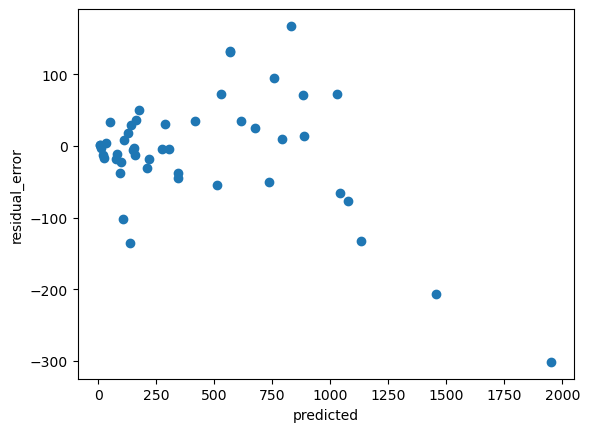

In [70]:
plt.scatter(ypred,residual_error)
plt.xlabel('predicted')
plt.ylabel("residual_error")

<Axes: xlabel='Weight', ylabel='Count'>

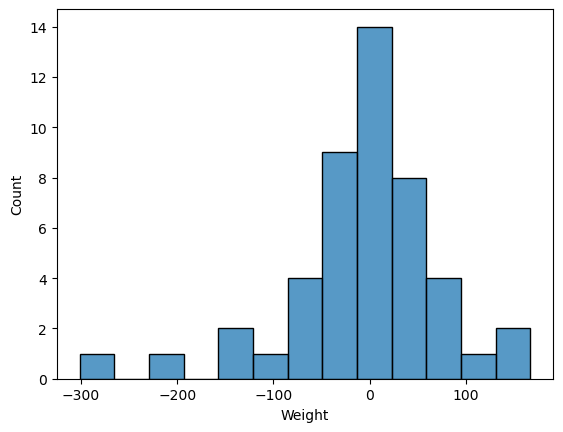

In [71]:
sb.histplot(residual_error)

<Axes: xlabel='Weight', ylabel='Density'>

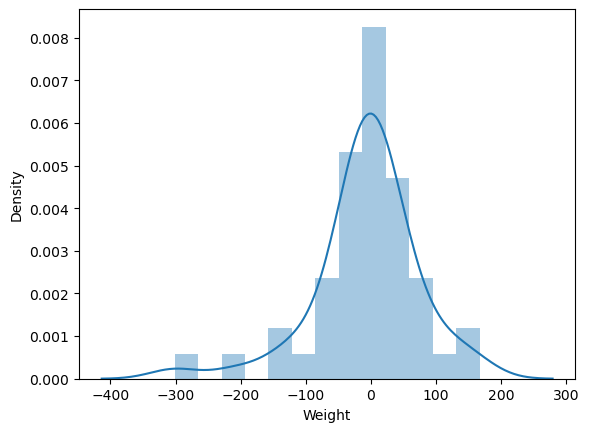

In [72]:
sb.distplot(residual_error)

<Axes: xlabel='Weight', ylabel='Density'>

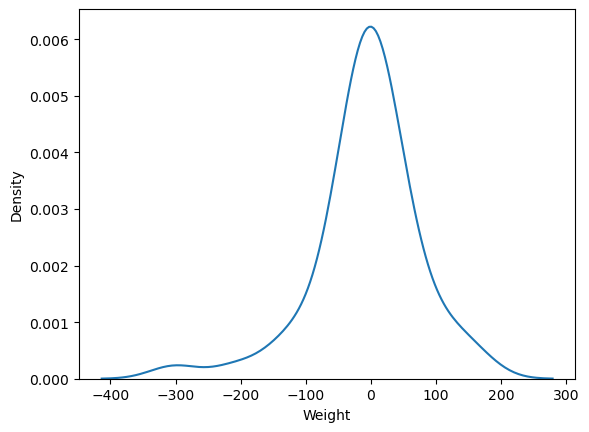

In [73]:
sb.distplot(residual_error,hist=False)

In [74]:
residual_error.skew()

-1.0995038809300037

In [75]:
lr.score(X_train,Y_train)

0.9874729277952143

In [76]:
lr.score(X_test,Y_test)

0.9618055569309943